importing the modules

In [2]:
import numpy as np
from pandas import DataFrame
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

loading the data and printing the first 5 images

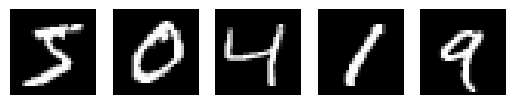

In [4]:
mnist = fetch_openml('mnist_784', version=1)
x=DataFrame(mnist.data)
y=DataFrame(mnist.target).values.ravel()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x.loc[i].values.reshape(28,28),cmap="gray")        
    plt.axis("off")
plt.show()        

Splitting the data 20% test,80% train

In [4]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=0.2)

In [5]:
model = LogisticRegression(tol=0.2,max_iter=1000)
model.fit(xTrain,yTrain)
pred=model.predict(xTest)

checking model accuracy

In [7]:
accuracy=accuracy_score(pred,yTest)
print("accuarcy "+str(accuracy))
confusionMatrix=confusion_matrix(pred,yTest)
print("confusion_matrix :\n" + str(confusionMatrix))

accuarcy 0.9184285714285715
confusion_matrix :
[[1292    0    4    5    3   13    7    5   10    8]
 [   1 1548   21    6    2   10    3    5   20   10]
 [   4    4 1238   34    8    8   16   25   17    7]
 [   0    9   17 1290    5   55    1    4   38   13]
 [   3    2   15    1 1189   14   17   10    6   40]
 [  16   10    7   37    5 1099   13    4   42    6]
 [   9    1   20    7   13   17 1334    0    8    0]
 [   6    4   18   14    7    2    0 1400    8   45]
 [  10   20   33   24   12   43    5    5 1193   16]
 [   2    2    7   15   51   12    0   45   15 1275]]


Since we have ten labels we end up with 10x10 confusion matrix.
1. The columns represent the model predictions and rows represent the actual output.
2. The element in the diagonal are the correct predictions
3. The elements above and under the diagonal are wrong predictions,example number times the model predicted 8 while it actually 0 is 10.

printing a sample of 25 wrong predictions alongside their corresponding image inputs 

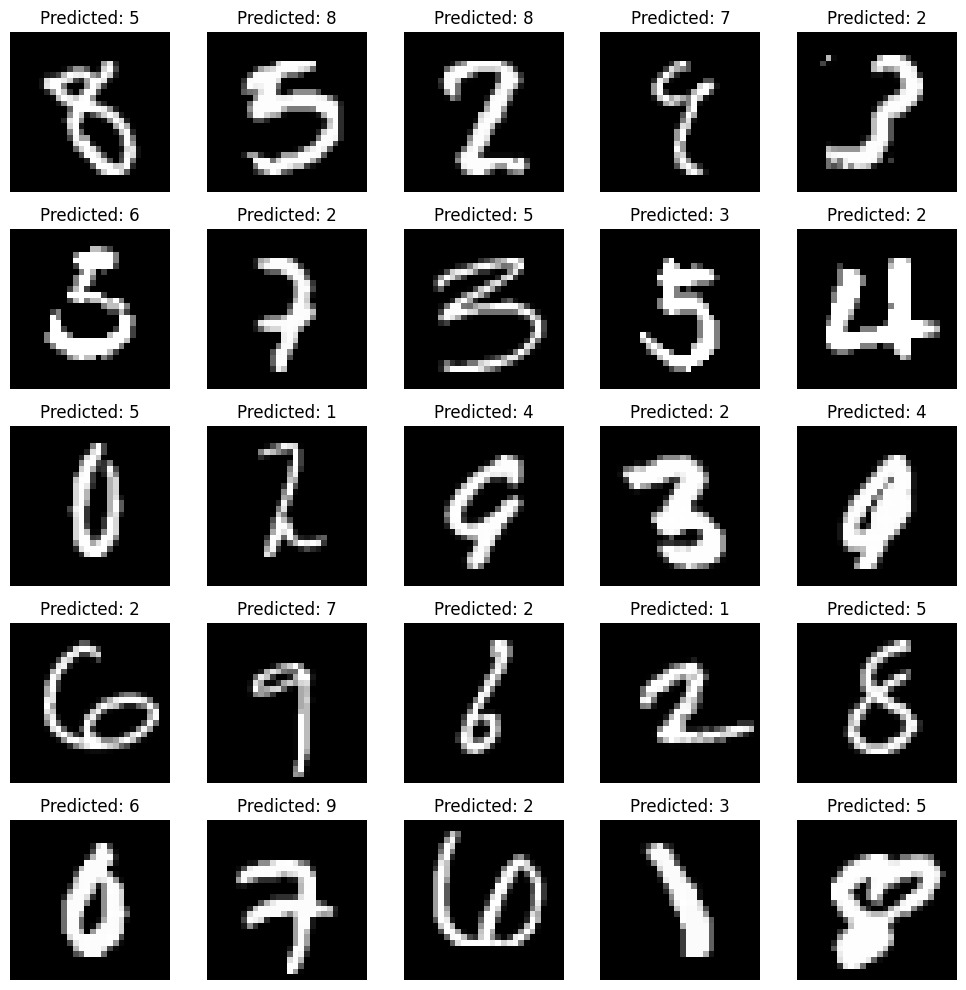

In [38]:
npTestData = np.array(xTest) 
incorrectCount = 0
plt.figure(figsize=(10, 10))     
for i in range(len(pred)):
    if pred[i] != yTest[i]:    
        incorrectCount += 1
        plt.subplot(5, 5, incorrectCount)
        plt.imshow(npTestData[i].reshape(28, 28), cmap="gray")
        plt.title("Predicted: " + str(pred[i]))
        plt.axis("off")
        if incorrectCount >= 25:
            break
        
plt.tight_layout()
plt.show()
